In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

house = load_boston()
house.keys()
house_df = pd.DataFrame(house.data,columns=house.feature_names)
house_df['PRICE'] = house.target
house_df.to_pickle('dataset/house_df.pkl')
house_df = pd.read_pickle('dataset/house_df.pkl')
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:title={'center':'Correlation'}>

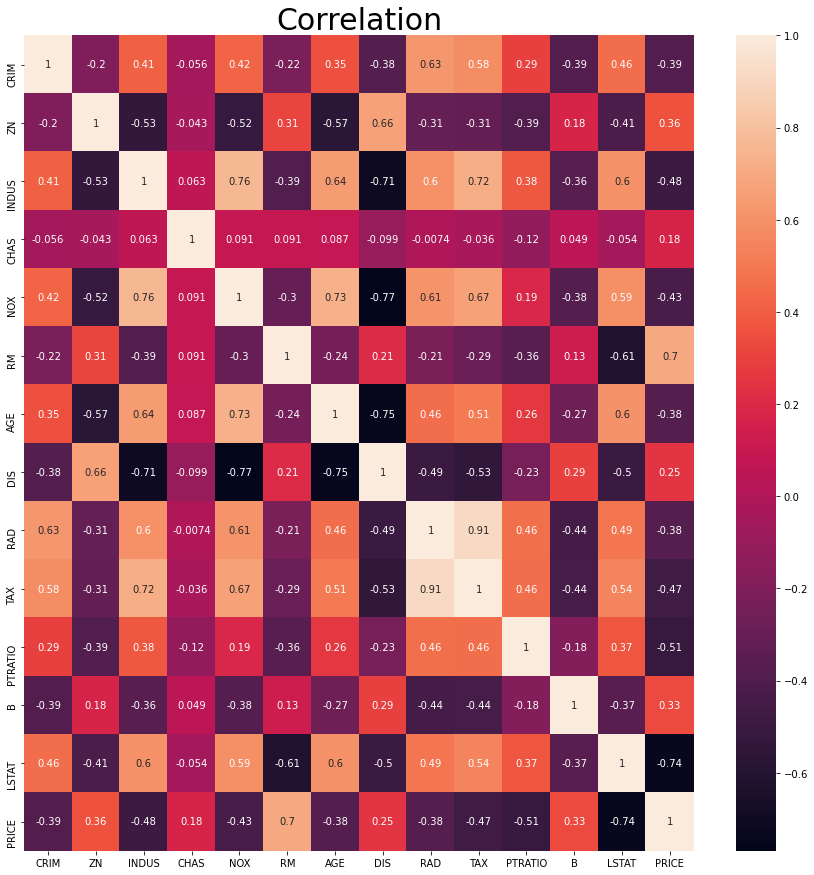

In [11]:
plt.figure(figsize=(15,15))
plt.title('Correlation', fontsize=30)
sns.heatmap(house_df.corr(),annot=True)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = house_df['PRICE']
X_data = house_df.drop(['PRICE'], axis=1)
# X_data = house_df[['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', \
#                    'LSTAT','RAD']]

X_train, X_test, y_train, y_test = \
train_test_split(X_data,y_target,test_size=0.3,random_state=1)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print('MSE : {:.3f}, RMSE : {:.3f}, R2 score : {:.3f}'.format(mse,rmse,r2))
print('절편 값 : ', lr.intercept_)
print('회귀 계수값 : ',np.round(lr.coef_, 1))

MSE : 19.831, RMSE : 4.453, R2 score : 0.784
절편 값 :  46.39649387182395
회귀 계수값 :  [ -0.1   0.1   0.1   2.4 -21.5   2.8   0.   -1.5   0.3  -0.   -1.    0.
  -0.6]


In [18]:
# 종속변수 로그 변환 및 독립변수 선택
import seaborn as sns
# sns.distplot(house_df.PRICE)
X=house_df[['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT','RAD']]
y=house_df['PRICE']
y_log = np.log1p(house_df['PRICE'])

X_train, X_test, y_train, y_test = \
train_test_split(X,y_log,test_size=0.3,random_state=1)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

mse = mean_squared_error(y_test_exp, y_pred_exp)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_exp,y_pred_exp)
print('MSE : {:.3f}, RMSE : {:.3f}, R2 score : {:.3f}'.format(mse,rmse,r2))
print('절편 값 : ', lr.intercept_)
print('회귀 계수값 : ',np.round(lr.coef_, 1))

MSE : 24.572, RMSE : 4.957, R2 score : 0.732
절편 값 :  4.161068564990513
회귀 계수값 :  [ 0.1 -0.   0.  -0.7  0.  -0.  -0.   0. ]
